In [1]:
import numpy as np
import datetime
import pandas as pd
import yfinance as yf
import yahoofinancials
import matplotlib.pyplot as plt
import pandas_datareader as pdr 


/home/deeplearner/anaconda3/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Measuring returns of Axis Bank and ICICI Bank  with respect to NIFTY 50 using Sharpe Ratio, Treynor Ratio and Jenson's Alpha

<b>The last five year data has been taken for performance mesurement

In [129]:
data1 = pdr.get_data_yahoo('^NSEI', datetime.date.today() - datetime.timedelta(1825),datetime.date.today())
data2 = pdr.get_data_yahoo('ICICIBANK.NS', datetime.date.today() - datetime.timedelta(1825),datetime.date.today())

data = pdr.get_data_yahoo('AXISBANK.NS', datetime.date.today() - datetime.timedelta(1825),datetime.date.today())
#data['nyfty'] = pdr.get_data_yahoo('^NSEI['Adj Close']', datetime.date.today() - datetime.timedelta(365),datetime.date.today())
data['Axis_Adj Close'] = data['Adj Close']
data['ICICI_Adj Close'] = data2['Adj Close']
data['Nifty_Adj Close'] = data1['Adj Close']

data['return_axis'] = ((data['Adj Close'] - data['Adj Close'].shift(1))/data['Adj Close'].shift(1))*100
data['return_icici'] = ((data['ICICI_Adj Close'] - data['ICICI_Adj Close'].shift(1))/data['ICICI_Adj Close'].shift(1))*100
data['return_nifty'] = ((data['Nifty_Adj Close'] - data['Nifty_Adj Close'].shift(1))/data['Nifty_Adj Close'].shift(1))*100
data.drop(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], axis = 1, inplace = True)
data.fillna(0, inplace = True)

# data['return_sqr'] = data['return']**2
# data['return_nifty_sqr'] = data['return_nifty']

#df['return_sum'] = df['return'] 

In [130]:
data.head()

,Axis_Adj Close,ICICI_Adj Close,Nifty_Adj Close,return_axis,return_icici,return_nifty
Date,,,,,,
2015-06-08,538.133850,242.609039,8044.149902,0.000000,0.000000,0.000000
2015-06-09,543.091492,245.993546,8022.399902,0.921266,1.395045,-0.270383
2015-06-10,548.729431,250.620377,8124.450195,1.038120,1.880875,1.272067
2015-06-11,531.475281,247.193405,7965.350098,-3.144382,-1.367395,-1.958288
2015-06-12,536.043945,253.576019,7982.899902,0.859619,2.582033,0.220327


In [187]:
return_axis_mean = data['return_axis'].mean()
print("return of Axis: ", return_axis_mean)
return_icici_mean = data['return_icici'].mean()
print("return of ICICI: ", return_icici_mean)
return_nifty_mean = data['return_nifty'].mean()
print("return of NIFTY 50: ", return_nifty_mean)

return of Axis:  0.003746408138076493
return of ICICI:  0.056539017470286924
return of NIFTY 50:  0.027910653037780127


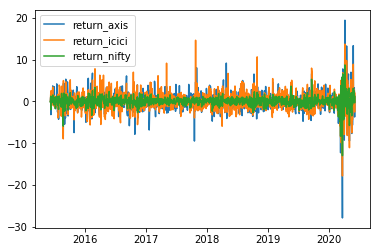

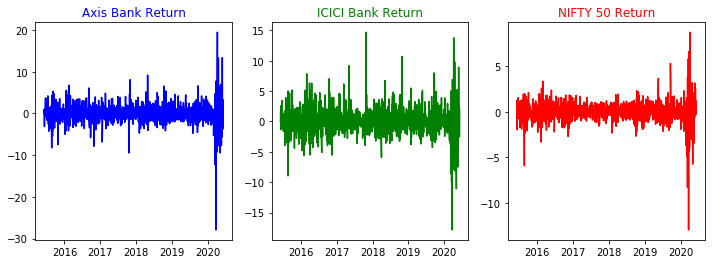

In [201]:
plt.plot(data['return_axis'])
plt.plot(data['return_icici'])
plt.plot(data['return_nifty'])
plt.legend()
#fig = plt.figure()
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
axes[0].plot(data['return_axis'], color = 'b')
axes[1].plot(data['return_icici'], color = 'g')
axes[2].plot(data['return_nifty'], color = 'r')
axes[0].set_title("Axis Bank Return", color = 'b')
axes[1].set_title("ICICI Bank Return", color = 'g')
axes[2].set_title("NIFTY 50 Return", color = 'r')
plt.show()

Avg. return of ICICI Bank is higher than the NIFTY 50 whereas Avg. return of Axis Bank is lower than NIFTY 50. From the graph, we can see that the trend is same but risk return varies.

In [169]:
data['mean_return_axis'] = (data['return_axis'] - data['return_axis'].mean())
data['mean_return_icici'] = (data['return_icici'] - data['return_icici'].mean())
data['mean_return_nifty'] = (data['return_nifty'] -  data['return_nifty'].mean())

In [174]:
data.head()

,Axis_Adj Close,ICICI_Adj Close,Nifty_Adj Close,return_axis,return_icici,return_nifty,mean_return_axis,mean_return_icici,mean_return_nifty,mean_return_nifty_sqr,cov_axis_nifty,cov_icici_nifty
Date,,,,,,,,,,,,
2015-06-08,538.133850,242.609039,8044.149902,0.000000,0.000000,0.000000,-0.003746,-0.056539,-0.027911,0.000779,0.000105,0.001578
2015-06-09,543.091492,245.993546,8022.399902,0.921266,1.395045,-0.270383,0.917519,1.338506,-0.298293,0.088979,-0.273690,-0.399268
2015-06-10,548.729431,250.620377,8124.450195,1.038120,1.880875,1.272067,1.034373,1.824336,1.244156,1.547925,1.286922,2.269759
2015-06-11,531.475281,247.193405,7965.350098,-3.144382,-1.367395,-1.958288,-3.148129,-1.423934,-1.986198,3.944983,6.252807,2.828216
2015-06-12,536.043945,253.576019,7982.899902,0.859619,2.582033,0.220327,0.855873,2.525494,0.192416,0.037024,0.164684,0.485946


In [178]:
data['cov_axis_nifty'] = (data['mean_return_axis']*data['mean_return_nifty'])
data['cov_icici_nifty'] = (data['mean_return_icici']*data['mean_return_nifty'])
covariance_axis = ((data['cov_axis_nifty'].sum())/(data.shape[0]))
covariance_icici = ((data['cov_icici_nifty'].sum())/(data.shape[0]))
print("Value of covariance for axis: ", covariance_axis)
print("Value of covariance for icic: ", covariance_icici)
                    

Value of covariance for axis:  1.8739272377578837
Value of covariance for icic:  1.875990175974752


In [179]:
data['mean_return_nifty_sqr'] = data['mean_return_nifty']**2
mean_return_nifty_sqr_sum = data['mean_return_nifty_sqr'].sum()
#print(mean_return_nifty_sqr_sum)
variance = data['mean_return_nifty_sqr'].sum()/(data.shape[0])
print("Value of variance for NIFTY 50: ", variance)

Value of variance for NIFTY 50:  1.3087323942634583


In [180]:
beta_axis = covarience_axis/varience
beta_icici = covarience_icici/varience
print(beta_axis)
print(beta_icici)

1.431864333741438
1.4334406210144592


Beta shows the risk assiciated with both the banks are higher than the market i.e both the stocks are more voletile than the market.

In [181]:
alpha_axis = (data['return_axis'].mean())/(beta_axis*data['return_nifty'].mean())
alpha_icici = (data['return_icici'].mean())/(beta_icici*data['return_nifty'].mean())
print(alpha_axis)
print(alpha_icici)

0.09374394347242168
1.413183479289746


Alpha is a measure of perforance of an investment. It shows the excess return from an investment as compared to its benchmark. Thus, according to the above  calculated figures the excess return of ICICI Bank is way higher than Axis Bank. 

In [182]:
Rf = 0.078

In [183]:
sharpe_index_axis = (data['return_axis'].mean()-Rf)/(alpha_axis+beta_axis)
sharpe_index_icici = (data['return_icici'].mean()-Rf)/(alpha_icici+beta_icici)
print(sharpe_index_axis)
print(sharpe_index_icici)

-0.048671466306887796
-0.007539099569704213


The Sharpe ratio is simply the risk premium per unit of risk, which is quantified by the total risk of the portfolio. Both the stocks have negative ratio means return per unit risk is low.

In [185]:
jenson_Index_axis = alpha_axis+(beta_axis*(data['return_axis'].mean() - Rf))
jenson_Index_icici =  alpha_icici+(beta_icici*(data['return_icici'].mean() - Rf))
print(jenson_Index_axis)
print(jenson_Index_icici)

-0.012577126366860092
1.3824204351647735


Jenson's Alpha determines the amount of the return which is due to market volatility as measured by the firm's beta in relation to the market beta. Again the ICICI return is much more higher than Axis Bank.

#### Keynote : The measurement has been done with the current market risk free rate. The measurement could have been somewhat different with prevailing risk-free rate.  

<b>Therefore it is clear that the investor investing in ICICI will get more return with the same level of risk. 